### 19.1 The Hello World of Machine Learning
The best small project to start with on a new tool is the classification of iris flowers. 
1. Loading the dataset.
2. Summarizing the dataset.
3. Visualizing the dataset.
4. Evaluating some algorithms.
5. Making some predictions.

### 19.2 Load The Data
#### 19.2.1 Import libraries

In [1]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load dataset
url = "https://goo.gl/mLmoIz"
names = ['sepal-length','sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

#### 19.3 Summarize the Dataset
In this step we are going to take alook at the data a few different ways:
- Dimensions of the dataset.
- Peek at the data itself.
- Statistical summary of all attributes.
- Breakdown of the data by the class variable.

#### 19.3.1 Dimensions of Dataset
We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [4]:
# shape
print(dataset.shape)

(150, 5)


#### 19.3.2 Peek at the Data

In [5]:
  # head
print(dataset.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


#### 19.3.3 Statistical Summary
This includes the count, mean, the min and max values as well as some percentiles.

In [6]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### 19.3.4 Class Distribution
We can view this as an absolute count.

In [8]:
 # class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### 19.4 Data Visualization

- Univariate plots to better understand each attribute.
- Multivariate plots to better understand the relationships between attributes.

### 19.4.1 Univariate Plots
we can create box and whisker plots of each.

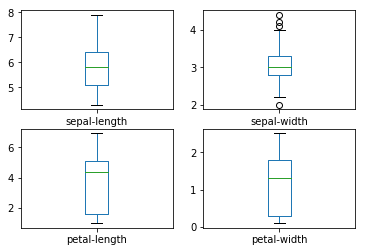

In [10]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

We can also create a histogram of each input variable to get an idea of the distribution.

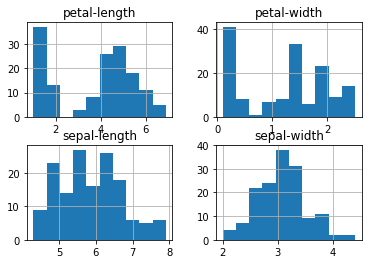

In [11]:
# histograms
dataset.hist()
plt.show()

### 19.4.2 Multivariate Plots
Now we can look at the interactions between the variables. 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  from ipykernel import kernelapp as app


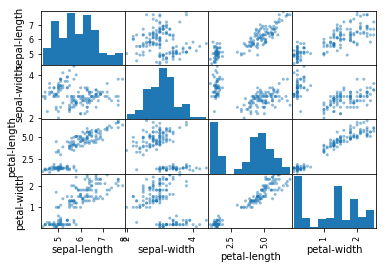

In [12]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

### 19.5 Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.
1. Separate out a validation dataset.
2. Set-up the test harness to use 10-fold cross validation.
3. Build 5 different models to predict species from flower measurements
4. Select the best model.

### 19.5.1 Create a Validation Dataset
we will use statistical methods to estimate the accuracy of the models that we create on unseen data.
We will split the loaded dataset into two, 80%
of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [17]:
from sklearn.model_selection import train_test_split
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

### 19.5.2 Test Harness

We will use 10-fold cross validation to estimate accuracy. This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [18]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

We are using the metric of accuracy to evaluate models. This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). 

### 19.5.3 Build Models

We don’t know which algorithms would be good on this problem or what configurations to use.
- Logistic Regression (LR).
- Linear Discriminant Analysis (LDA). 
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART). 
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable. 

In [19]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [23]:
from sklearn import model_selection
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold,
      scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

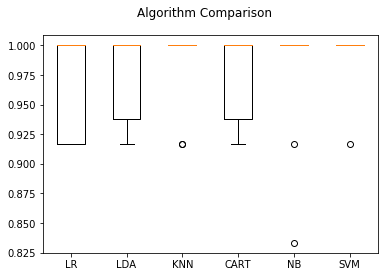

In [24]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 19.6 Make Predictions
The KNN algorithm was the most accurate model that we tested.
It is important to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result. We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [25]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

